In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [193]:
df = pd.read_csv("wine_data.csv",index_col=[0]).dropna(subset=['price'])
# df.head(100)

In [194]:
Q99 = int(df["price"].quantile(0.99))
# print(Q99)

In [195]:
df.drop(df[ (df['price'] > Q99)].index , inplace=True)
# df.head(100)

Create a new column with price intervals
Count the points in each interval for each point value
Rename the columns to match your desired format
Normalize each column to add up to 100
Fill NaN values with 0

In [196]:
df['price_interval'] = pd.cut(df['price'], bins=np.arange(0, Q99+5, 5), right=False)

temp = pd.crosstab(index=df['points'], columns=df['price_interval'])
temp.columns = ["under"+str(int(b)) for b in range(5,Q99+5,5)]

df = temp.apply(lambda x: (x / x.sum()) * 100, axis=0)
df = df.fillna(0).astype(int)

# print(result)
df_weight = df.multiply(df.index - 80, axis=0)
# print(df_weight)

In [197]:
mean = df_weight.mean()
# mean

In [198]:
variance = df.var()
variance

# # Calculate the squared differences
# squared_diffs = ((df - mean) ** 2).multiply(df, axis=0)
# # Calculate the variance (average of squared differences)
# variance = squared_diffs.mean()
# variance

under5      163.414286
under10      45.461905
under15      38.961905
under20      35.157143
under25      31.557143
under30      28.247619
under35      26.647619
under40      24.857143
under45      25.657143
under50      29.257143
under55      27.947619
under60      30.561905
under65      28.947619
under70      30.657143
under75      34.947619
under80      27.433333
under85      30.733333
under90      30.547619
under95      36.347619
under100     32.633333
under105     29.033333
under110     44.761905
under115     32.957143
under120     37.461905
under125     36.557143
under130     31.357143
under135     34.057143
under140     27.957143
under145     47.547619
under150     52.257143
dtype: float64

In [199]:
alpha_mom = (mean**2)/variance
beta_mom = variance/mean
alpha_mom, beta_mom

(under5       2.885367
 under10      8.966965
 under15     15.556157
 under20     24.157427
 under25     32.642509
 under30     41.846001
 under35     49.799602
 under40     61.488871
 under45     66.894687
 under50     63.759378
 under55     69.422470
 under60     70.099274
 under65     74.465960
 under70     73.817734
 under75     71.808408
 under80     81.012721
 under85     80.572034
 under90     87.064469
 under95     74.529081
 under100    85.460035
 under105    94.503932
 under110    67.229179
 under115    82.648117
 under120    78.526999
 under125    86.954602
 under130    94.971689
 under135    94.603175
 under140    99.036020
 under145    64.949281
 under150    61.448272
 dtype: float64,
 under5      7.525658
 under10     2.251651
 under15     1.582592
 under20     1.206373
 under25     0.983234
 under30     0.821607
 under35     0.731503
 under40     0.635810
 under45     0.619310
 under50     0.677398
 under55     0.634486
 under60     0.660288
 under65     0.623487
 under7

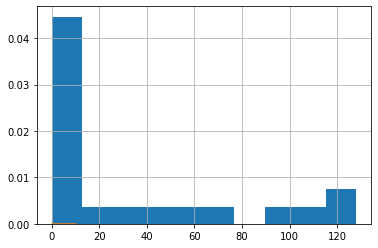

In [200]:
df_result.under25.hist(density=True, bins=10)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[4], beta_mom[4]))
# plt.xlim([0, 50])

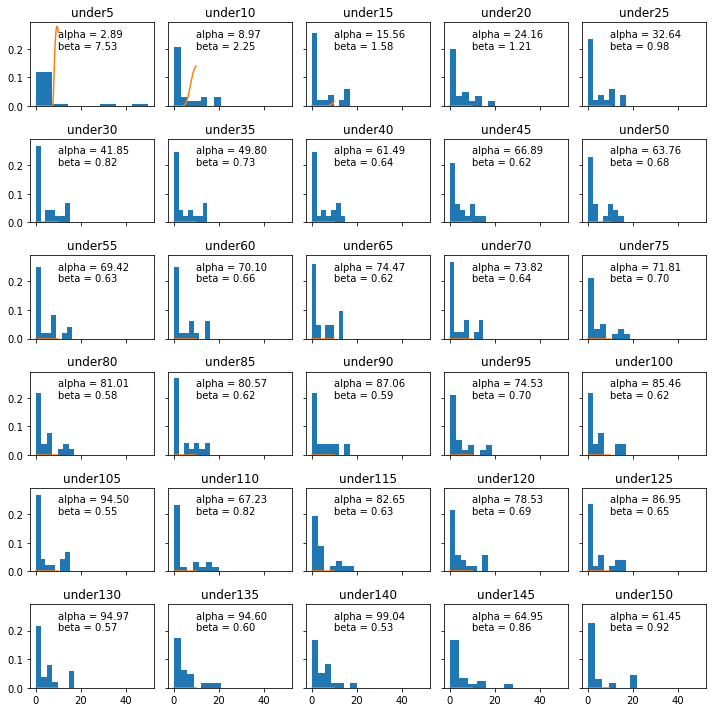

In [201]:
# List of values for "underX"
underX_values = [i for i in range(5,Q99+5,5)]  # Fill in the desired values

# Create a figure with subplots
fig, axs = plt.subplots(6, 5, figsize=(10, 10), sharex=True, sharey=True)


for i, underX in enumerate(underX_values):
    
    row_idx = i // 5
    col_idx = i % 5

    # Create a histogram for the current "underX"
    axs[row_idx, col_idx].hist(result[f'under{underX}'], density=True, bins=7)
    
    # Fit and plot the gamma distribution for the current "underX"
    x = np.linspace(0, 10)
    axs[row_idx, col_idx].plot(x, gamma.pdf(x, alpha_mom[i], beta_mom[i]))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[i], beta_mom[i])
    axs[row_idx, col_idx].annotate(label, xy=(10, 0.2))

# Set titles for the subplots (underX values)
# for i, underX in enumerate(underX_values):
    axs[row_idx, col_idx].set_title(f'under{underX}')

plt.tight_layout()
plt.show()
